In [34]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/assignment-7/insurance.csv


In [35]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
from pandas_profiling import ProfileReport
import plotly.express as px


df=pd.read_csv("../input/assignment-7/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# FEATURE SELECTION

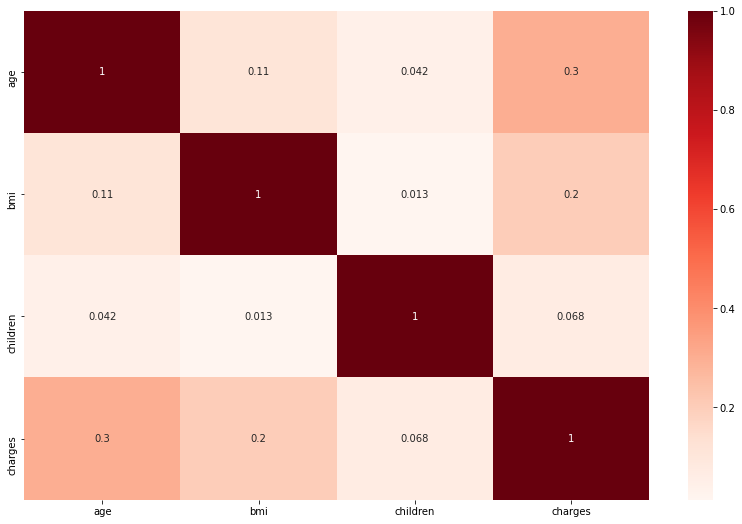

In [36]:
#using pearson correlation 
plt.figure(figsize=(14, 9))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


In [37]:
#Correlation with output variable
cor_target = abs(cor["charges"])
cor_target

age         0.299008
bmi         0.198341
children    0.067998
charges     1.000000
Name: charges, dtype: float64

In [38]:
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

age        0.299008
charges    1.000000
Name: charges, dtype: float64

In [39]:
#separating target variable from feature
#creating x=all feature columns except target
X=df.drop("charges",axis=1)

#creating y=label
y=df["charges"]

In [40]:
X

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [41]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [42]:
#droping region in our data
df2=X.drop(['region'],axis=1)
df2.head()

,age,sex,bmi,children,smoker
0,19,female,27.900,0,yes
1,18,male,33.770,1,no
2,28,male,33.000,3,no
3,33,male,22.705,0,no
4,32,male,28.880,0,no


In [43]:
#Converting the predictor variable in a binary numeric variable
df2['sex'].replace(to_replace='Yes', value=1, inplace=True)


df2['sex'].replace(to_replace='No',  value=0, inplace=True)


In [44]:
#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)

# show  the first 5 rows 
df_dummies.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,1,0,0,1
1,18,33.770,1,0,1,1,0
2,28,33.000,3,0,1,1,0
3,33,22.705,0,0,1,1,0
4,32,28.880,0,0,1,1,0


In [45]:
#separating target variable from feature
#creating x=all feature columns except target
X=df_dummies

#creating y=label
y=y

In [46]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,1,0,0,1
1,18,33.770,1,0,1,1,0
2,28,33.000,3,0,1,1,0
3,33,22.705,0,0,1,1,0
4,32,28.880,0,0,1,1,0
...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0
1334,18,31.920,0,1,0,1,0
1335,18,36.850,0,1,0,1,0
1336,21,25.800,0,1,0,1,0


In [47]:
X.sex_male

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex_male, Length: 1338, dtype: uint8

In [48]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

Since out target is known, we are on supervised learning. Our target have variables that are numeric and continous there we are going to use regression.

In [49]:
from scipy.stats import skew
import numpy as np 

In [50]:
# skewness along the index axis
y.skew(axis = 0, skipna = True)

1.5158796580240388

The skewness is more than 0 implies that more weight in the left tail of the distribution. Therefore we apply log transform to make it normally distributed.

Text(0.5, 0, 'target')

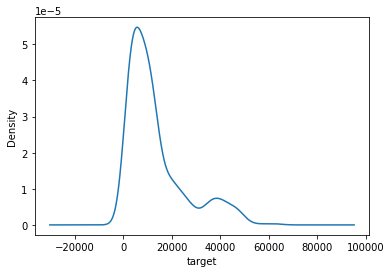

In [51]:
#graph to show that more weight is on the left hand side
import pandas as pd
import matplotlib.pyplot as plt
y.plot(kind = 'density')
plt.xlabel('target')

# Log Transform

 What are the benefits of log transform:
1. It helps to handle skewed data and after transformation, the distribution becomes more approximate to normal.
2. It also decreases the effect of the outliers, due to the normalization of magnitude differences and the model become more robust.
3. Convenience: A transformed scale may be as natural as the original scale and more convenient for a specific purpose (e.g. percentages rather than original data, sines rather than degrees). One important example is standardization.

In [52]:
# Calculate logarithm to 
# base 10 on 'Salary' column
df['logarithm_base10'] = np.log10(y)
  
# Show the dataframe
df['logarithm_base10']
# skewness along the index axis
df['logarithm_base10'].skew(axis = 0, skipna = True)

-0.09009752473025423

In [53]:
# Calculate natural logarithm on
# 'Salary' column
df['natural_log'] = np.log(y)
  
# Show the dataframe
df['natural_log']
# skewness along the index axis
df['natural_log'].skew(axis = 0, skipna = True)

-0.09009752473024582

IF WE AROUND OUR VALUE TO WHOLE NUMBER HENCE NORMAL. LET'S VIRTUALISE IN A PLOT.

Text(0.5, 0, 'target')

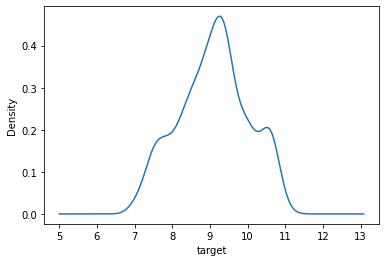

In [54]:
#the graph of target after applying log, hence normally distributed.

df['natural_log'].plot(kind = 'density')
plt.xlabel('target')

In [55]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1003, 7), (335, 7), (1003,), (335,))

In [56]:
y_test

855      1875.34400
102     21344.84670
17       2395.17155
431      4906.40965
790      5662.22500
           ...     
1027    21595.38229
1059     4462.72180
386     11856.41150
579      3206.49135
6        8240.58960
Name: charges, Length: 335, dtype: float64

In [57]:
y_train


312     42124.51530
61       4504.66240
152      6334.34355
373     36085.21900
611      6571.54400
           ...     
1312     4536.25900
1035    12094.47800
1076     8551.34700
699      3500.61230
566      6373.55735
Name: charges, Length: 1003, dtype: float64

# LINEAR REGRESSION

In [58]:
"""
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
# save the model
model = LogisticRegression()

#traning  the model using xand y 
result = model.fit(X_train, y_train)
"""

from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
regression_model.score(X_test,y_test)




0.6830037792917526

# Random Forest Regression

In [59]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_jobs=-1,random_state=50)
model.fit(X_train,y_train)


model.score(X_test,y_test)



0.7907016813257395

In [68]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [61]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

# Linear Regression

In [62]:

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

pred_train_lr= lr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print(r2_score(y_train, pred_train_lr))

pred_test_lr= lr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
print(r2_score(y_test, pred_test_lr))

6092.526682530398
0.7633591237533215
5975.765236899599
0.6830037792917526


R-squared value is 76 percent for train data and 68 percent for test data, which is a good performance. 

# Ridge Regression

In [63]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

6092.526689737626
0.7633591231934471
5975.7259949590325
0.6830079426099269


# Lasso Regression

In [64]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

6092.526682625598
0.7633591237459261
5975.762043140939
0.6830041181300819


# ElasticNet Regression

In [65]:
#Elastic Net
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, y_train) 
pred_train_enet= model_enet.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_enet)))
print(r2_score(y_train, pred_train_enet))

pred_test_enet= model_enet.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print(r2_score(y_test, pred_test_enet))

6094.286086993668
0.7632224293563787
5957.896783767416
0.6848966795071719


#  Decision Tree Regressor 

In [ ]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_test,y_test)
# predicting a new value
  
# test the output by changing values, like 3750
y_pred = regressor.predict(X_test)
  
# print the predicted price
#print("Predicted price: % d\n"% y_pred) 
print(np.sqrt(mean_squared_error(y_train,y_pred)))
print(r2_score(y_train, y_pred))


# Neural Network Regression

In [ ]:


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(X_train,y_train)
#sc.fit(X_test,y_test)
sc.transform(X_test,y_test)

# Random forest regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_jobs=-1,
                              random_state=80)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
regression_model.score(X_test,y_test)

#regression_model.score(X_test,y_test)
y_pred = regression_model.predict(X_test)

# MEAN ABSOLUTE ERROR

In [74]:
#Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

57.138432388059705

# R² Score

In [75]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9951455673147593

# MEAN SQUARED ERROR

In [76]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

546854.0763406155